<a href="https://colab.research.google.com/github/AlexBB999/NLP/blob/master/Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hi**

**The reason you keep rejecting my notebook is because you did not notice the word VERBATIM in my project**.

ver·ba·tim
/vərˈbādəm/

Learn to pronounce

adverb · adjective
**in exactly the same words as were used originally**




**This objective was not to build and evaluate an NER, POS or Dependency Parsing model -- the objective was to build an EXTRACTIVE SUMMARIZER**.

**EXTRACIVE SUMMARIZATION (from my presentation)**

 there are two different approaches for automatic summarization: extraction and abstraction. **Extractive summarization methods work by identifying important sections of the text and generating them verbatim**; […]

**Below I will show you the difference between a PARAGRAPH summarized before text normalization and the same PARAGRAPH summarized after normalization**.

 **This will show/demonstrate two things**:

1 – **I know how to normalize/preprocess text data**

2 – **WHY EXTRACTIVE SUMMARIZATION DOES FIRST NORMALIZE**

**A little further I down will generate summary statistics and explain why I did not use them in the presentation**.



The original paragraph:

In [85]:
print(P)

('On July 16, 1969, the Apollo 11 spacecraft launched from the Kennedy Space '
 'Center in Florida. Its mission was to go where no human being had gone '
 'before—the moon! The crew consisted of Neil Armstrong, Michael Collins, and '
 'Buzz Aldrin. The spacecraft landed on the moon in the Sea of Tranquility, a '
 'basaltic flood plain, on July 20, 1969. The moonwalk took place the '
 'following day. On July 21, 1969, at precisely 10:56 EDT, Commander Neil '
 'Armstrong emerged from the Lunar Module and took his famous first step onto '
 'the moon’s surface. He declared, “That’s one small step for man, one giant '
 'leap for mankind.” It was a monumental moment in human history!')


In [0]:
P='On July 16, 1969, the Apollo 11 spacecraft launched from the Kennedy Space Center in Florida. Its mission was to go where no human being had gone before—the moon! The crew consisted of Neil Armstrong, Michael Collins, and Buzz Aldrin. The spacecraft landed on the moon in the Sea of Tranquility, a basaltic flood plain, on July 20, 1969. The moonwalk took place the following day. On July 21, 1969, at precisely 10:56 EDT, Commander Neil Armstrong emerged from the Lunar Module and took his famous first step onto the moon’s surface. He declared, “That’s one small step for man, one giant leap for mankind.” It was a monumental moment in human history!'

In [0]:
from pprint import pprint as print
from gensim.summarization import summarize

**SUMMARY BEFORE NORMALIZATION**

In [25]:
print(summarize(P,split=True))

['On July 21, 1969, at precisely 10:56 EDT, Commander Neil Armstrong emerged '
 'from the Lunar Module and took his famous first step onto the moon’s '
 'surface.']


  **NORMALIZE THE TEXT**

In [0]:
stop_words = set(stopwords.words('english')) 

In [54]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    #for doc in docs:
    tokenized = word_tokenize(docs)

    cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                for token in tokenized 
                if not token.lower() in stopwords.words('english') ]
                #if token.isalpha()]

    untokenized = " ".join(cleaned)
    preprocessed.append(untokenized)
        
    return preprocessed

In [0]:
P2=preprocess(P)

In [0]:
P3=P2[0]

**SUMMARY AFTER PREPROCESSING/NORMALIZATION**

  **THE LONGER THE TEXT, THE WORSE IT GETS**

  **NEED I SAY MORE?**

In [78]:
print(summarize(P3))

('juli 21 , 1969 , precis 10:56 edt , command neil armstrong emerg lunar modul '
 'took famous first step onto moon ’ surfac .')


**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**NEXT I WILL GENERATE SUMMARY STATISTICS FOR THE DOCUMENT USED IN THIS PROJECT**

**I DID NOT USE THESE IN THE PRESENTATION SINCE THEY ARE NOT GERMANE**

**FEW END USERS (POSSIBLY OTHER NLP PEOPLE) USING AN EXTRACTIVE SUMMARIZER ARE CONCERNED WITH AVERAGE SENTENCE LENGTH, NUBER OF WORDS, LEXICAL DIVERSITY ETC**

In [0]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens]
            #if not token.lower() in stopwords.words('english')
            # if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats

In [0]:
stats = []

#for index, doc in enumerate(docs):
doc_stats = text_stats(k)
doc_stats = [f'ArticleX'] + doc_stats
stats.append(doc_stats)

doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

In [82]:
doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,ArticleX,282,8917,8917,1615,103,31.620567,4.353931,0.181115


In [83]:
doc_df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
mean,282.0,8917.0,8917.0,1615.0,103.0,31.620567,4.353931,0.181115
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,282.0,8917.0,8917.0,1615.0,103.0,31.620567,4.353931,0.181115
25%,282.0,8917.0,8917.0,1615.0,103.0,31.620567,4.353931,0.181115
50%,282.0,8917.0,8917.0,1615.0,103.0,31.620567,4.353931,0.181115
75%,282.0,8917.0,8917.0,1615.0,103.0,31.620567,4.353931,0.181115
max,282.0,8917.0,8917.0,1615.0,103.0,31.620567,4.353931,0.181115


**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

###**NOTHING BELOW HERE HAS CHANGED**



Here is the link to the data

It is one file

You will probably need to download it first

https://raw.githubusercontent.com/AlexBB999/NLP/master/Allen2.json

NOTE:I did not use a lot of the imports

If you have any problems running this notebook , please let me know -- Thanks



In [45]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [37]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##**THE SUM(MARY) OF ALL THINGS**

Alex Sloan

May 27, 20202

###**There are two main approaches to summarizing text documents; they are:**

###1.	**Extractive Methods**

###2. **Abstractive Methods**

###… **there are two different approaches for automatic summarization: extraction and abstraction. Extractive summarization methods work by identifying important sections of the text and generating them verbatim; […]**
###**abstractive summarization methods aim at producing important material in a new way. In other words, they interpret and examine the text using advanced natural language techniques in order to generate a new shorter text that conveys the most critical information from the original text**

Text Summarization Techniques: A Brief Survey, 2017.



**OBJECTIVE:**

####**Build a bert based domain/business specific abstractive summarier**

####**The domain, in this model --  COVID-19**

###**In other words, build CovidBert**

**I WILL BE USING FOUR DIFFERENT EXTRACTIVE SUMMARIZER MODELS:**

**COUNT VECTORIZE**

**TF_IDF VECTORIZE**

**GENSIM**

**BERT**

**STAKEHOLDERS**

**The stakeholders are just about anybody.**

**1.7MB of data is created every second for every person on earth.**

**No one has time to read even an infentesimal fraction of it**.

**A domain specific summarier lets you scan the summary of articles that are germane to your discipline or**

**allows you to create summarizers that you can use in your business -- either internally or client facing**.



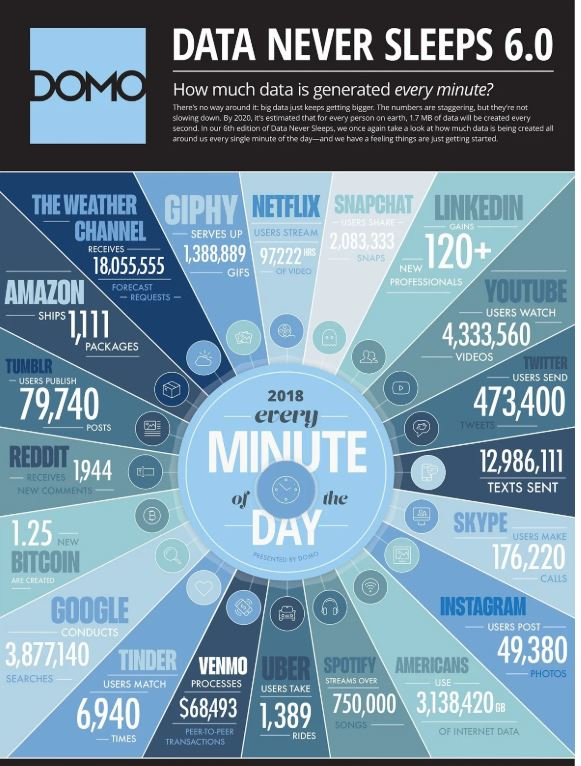

In [0]:
from IPython.display import Image

Image('https://raw.githubusercontent.com/AlexBB999/NLP/master/Capture2.jpg')

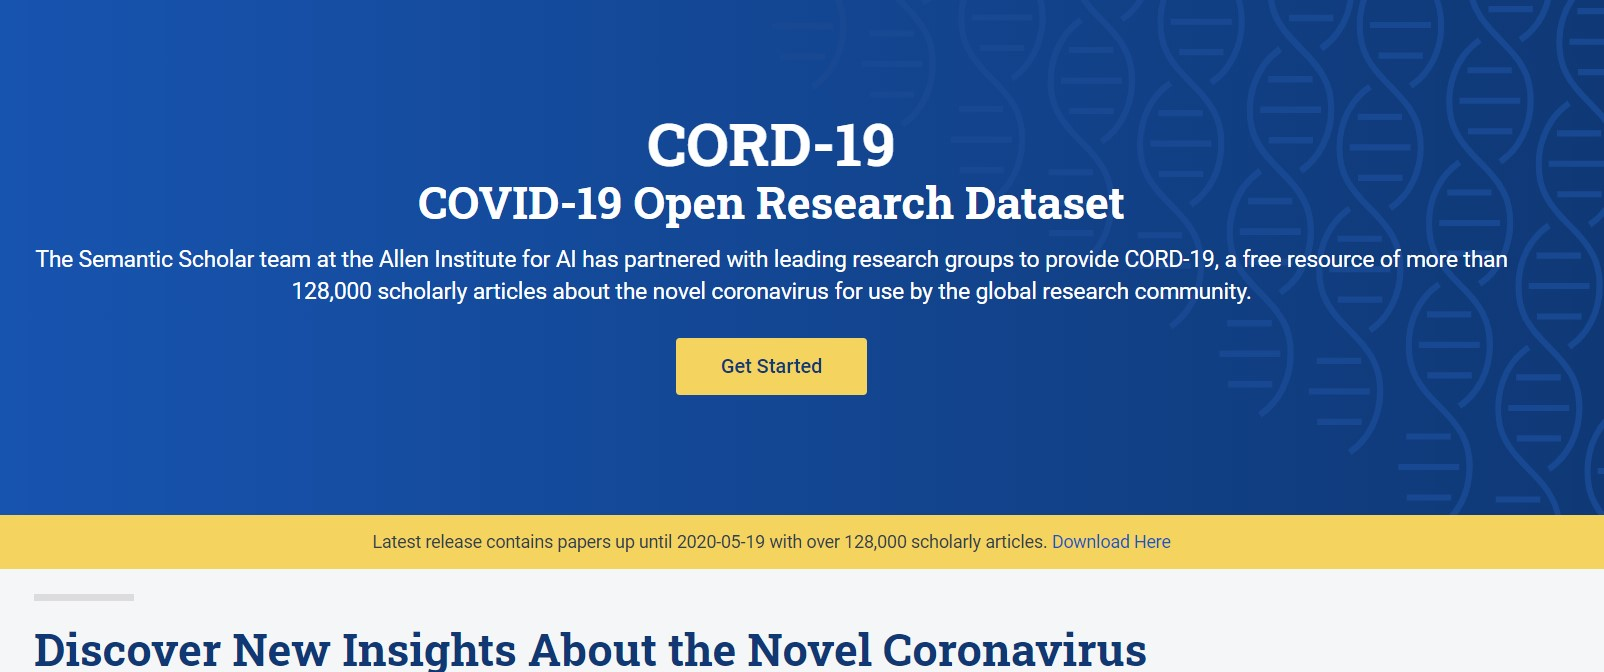

In [0]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/NLP/master/Covid%202020-05-26%20200130.jpg')

In [0]:
from sklearn.metrics import silhouette_score

In [0]:
%matplotlib inline
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [0]:
import pandas as pd
import numpy as np
import re
import json
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [0]:
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text

In [0]:
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.cluster.util import cosine_distance
import networkx as nx

In [0]:
import json

In [0]:
with open('/content/Allen2.json') as json_file:
    data2 = json.load(json_file)

**K IS THE DOCUMENT AS ONE LONG STRING**

In [0]:
k=''
for text in data2['body_text']:
  k=k+(text["text"])

In [16]:
len(k)

46281

In [17]:
k

"Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system. IFNs are extracellular cytokines specific to (jawed) vertebrates and central to host innate immunity. Upon binding of cognate receptors, they induce numerous intracellular signaling cascades, leading to transcriptional activation of several hundred genes, which altogether determine the biological outcome involving antiviral, antitumoral, and immunomodulatory effects [1] [2] [3] [4] . One gene family induced by IFNs is the double-stranded RNA-dependent 2′-5′ oligoadenylate synthetases (dsRNA-dependent OASs) in humans comprising four members, OAS1, OAS2, OAS3 and OAS-like (OASL). At least six OAS isoforms are expressed from these four human genes: two splice variants from the OAS1 and OAS2 genes and a single variant from each of the OASL and OAS3 genes [5, 6] . In comparison, the mic

**K2 BREAKS IT INTO SENTENCES**

In [0]:
k2=k.split('. ')

In [0]:
#k2

In [0]:
df_k2=pd.DataFrame(data=k2)

In [0]:
df_k2.columns=['text']

In [20]:
df_k2.shape

(287, 1)

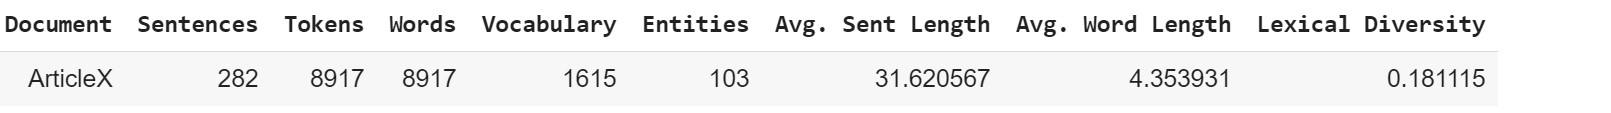

In [0]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/AlexBB999/NLP/master/NLP_summary.jpg")

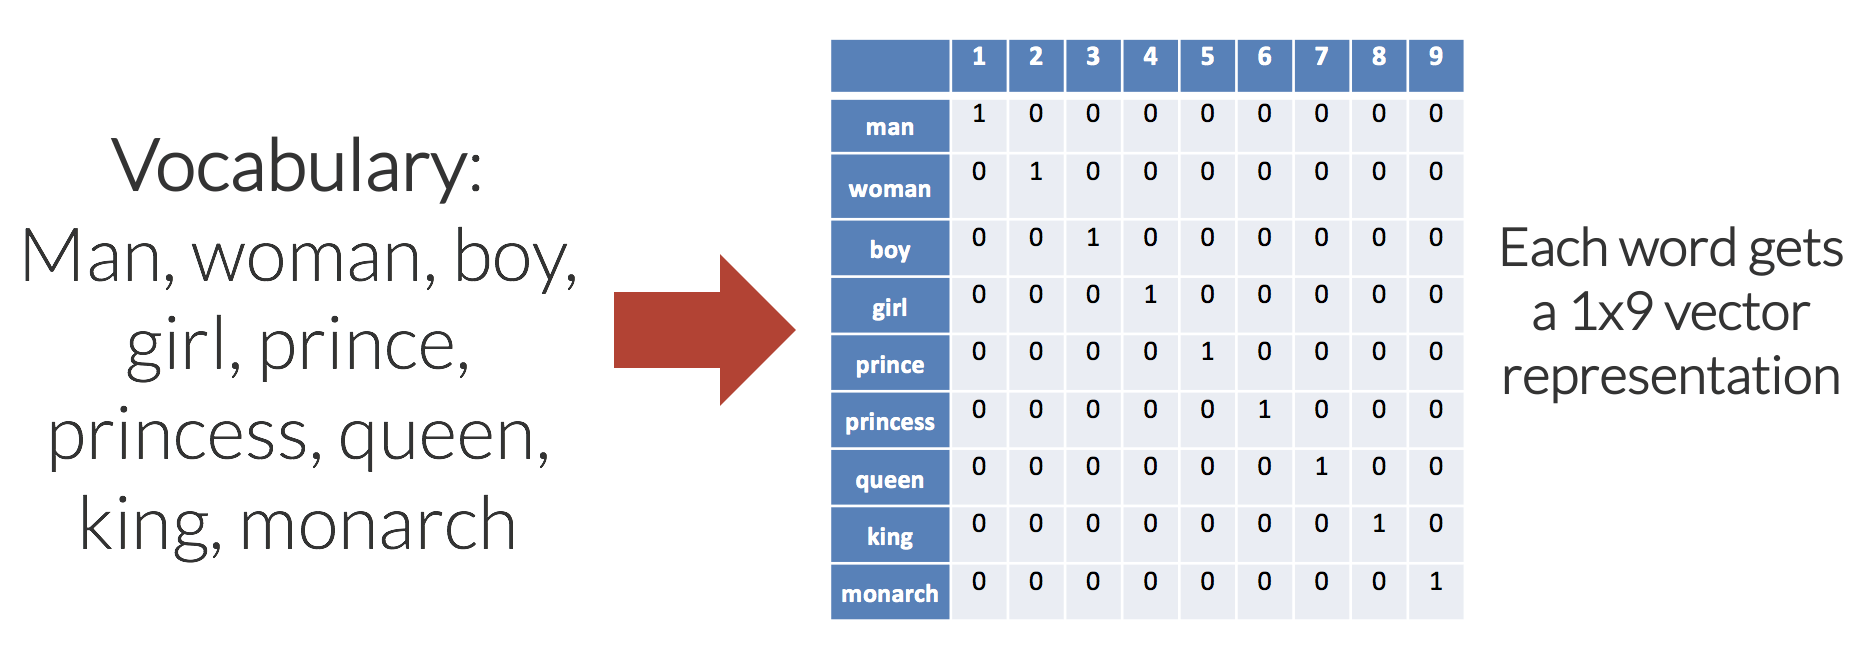

In [0]:
Image("https://raw.githubusercontent.com/AlexBB999/NLP/master/one-hot-word-embedding-vectors.png")

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cce9fa5c0>,
                    color=None,
                    features=['000', '0005', '0008', '0009', '01', '02', '09',
                              '10', '100', '11', '12', '124', '12mer', '13',
                              '14', '15', '16', '17', '18', '19', '1a', '1b',
                              '1d', '1e', '1x', '20', '200', '21', '22', '23', ...],
                    n=None, orient='h')

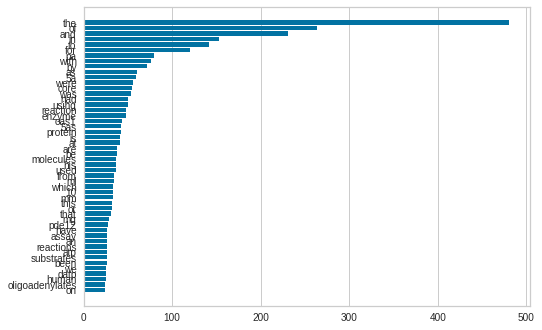

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(k2)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h')
plt.xlabel=( 'WORDS')
visualizer.fit(docs)
#visualizer.show()

**COUNT VECTORIZE**

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(df_k2)

In [0]:
len(count_vectorizer.vocabulary_)

1

In [0]:
count_vectorizer = CountVectorizer()
countx = count_vectorizer.fit_transform(df_k2.text)

In [0]:
cvf=count_vectorizer.get_feature_names()

In [0]:
df_features=pd.DataFrame(data=countx.toarray(),columns=cvf,index=k2)

In [0]:
df_features.shape

(287, 1406)

In [0]:
#df_features.head(2)

In [0]:
#print(count_vectorizer.vocabulary_)

In [0]:
countx

<287x1406 sparse matrix of type '<class 'numpy.int64'>'
	with 5917 stored elements in Compressed Sparse Row format>

In [0]:
doc_term_matrix = countx.todense()
df = pd.DataFrame(doc_term_matrix)

In [0]:
df.shape

(287, 1406)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
cs=cosine_similarity(df.values, df.values)

In [0]:
cs.shape

(287, 287)

In [0]:
 sentence_similarity_graph=nx.from_numpy_matrix(cs)
 scores = nx.pagerank(sentence_similarity_graph)

In [0]:
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)  

In [0]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)   
  print(' ') 
  print(' ')
  print('ranked sentences',ranked_sentence)
  print("Indexes of top ranked_sentence order are ", ranked_sentence)    
  #ranked_sentence

 
 
ranked sentences [(0.006336042112799102, 'The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNT

In [0]:
ranked_sentence[1]

(0.006155112816624812,
 'The specific activity of PDE12 (mole 5′-AMP synthesized per second per gram of protein (mole AMP/(sec*g)) was calculated with the formula:Total 254nm refers to the sum of the integral of all peaks in a given chromatogram at 254 nm for a single reaction, [A(pA) n ] start is the start concentration of the substrate A(pA) n, V is the reaction volume, T the reaction time and M the amount of protein added.As an example, the tetramer core substrate would be expected to undergo cleavage into the following products using PDE12 as the enzyme:In the case of purified protein, the specific enzyme activity of PDE12, E(PDE12) could therefore be calculated using the formula:For reactions including crude protein extracts, the specific enzyme activities were calculated in mmole AMP/ (sec*g of total protein)')

In [0]:
for i in range(3):
  print(ranked_sentence[i][1])

The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNTP (dATP, dCTP, dGTP or TTP) and NAD + were use

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**TF-IDF**

In [0]:
tf_vectorizer=TfidfVectorizer()
tf =tf_vectorizer.fit_transform (df_k2.text)

In [0]:
tf

<287x1406 sparse matrix of type '<class 'numpy.float64'>'
	with 5917 stored elements in Compressed Sparse Row format>

In [0]:
doc_tf_matrix = tf.todense()
df2 = pd.DataFrame(doc_tf_matrix)

In [0]:
df2.shape

(287, 1406)

In [0]:
doc_tf_matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cost=cosine_similarity(df2.values,df2.values)

In [0]:
 sentence_similarity_graph=nx.from_numpy_matrix(cost)
 scores = nx.pagerank(sentence_similarity_graph)

In [0]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)

In [0]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)   
  print(' ') 
  print(' ')
  print('ranked sentences',ranked_sentence)
  print("Indexes of top ranked_sentence order are ", ranked_sentence) 

 
 
ranked sentences [(0.007270650467458789, 'The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNT

In [0]:
for i in range(3):
  print(ranked_sentence[i][1])

The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNTP (dATP, dCTP, dGTP or TTP) and NAD + were use

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**GENSIM**

In [0]:
from pprint import pprint as print
from gensim.summarization import summarize

In [0]:
s=summarize(k,split=True,ratio=.05)

In [0]:
s

['The following general reaction scheme apply to the varied enzyme capabilities of the OASs: RpA + (d)NTP → PPi + RpA-(d)NMP in which the incorporation of AMP prompts for oligoadenylate synthesis by means of multiple 2′ elongation events (the other NMPs and dNMPs make up single incorporation events only).Due to low sequence specificity, RNase L degrades cellular RNA and prolonged activation results in an antiproliferative response leading to apoptosis [9] [10] [11] 16] .',
 'This assay is well-suited to assess the broader cellular role expected of the OASs, based on the very diverse substrate specificity in vitro.Human OAS1 p42 containing an N-terminal His-tag (His-OAS1) cloned in the pET9d bacterial expression vector was a kind gift from Kineta (formerly Illumigen Biosciences).The plasmid was transformed into the E.coli BL21 (DE3) strain and plated on selective LB agar (50 μg/mL ampicillin), followed by inoculation of single colonies to selective LB medium for incubation at 37°C for 1

**xxxxxXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**BERT**

In [0]:
! pip install bert-extractive-summarizer

     |████████████████████████████████| 665kB 4.2MB/s 
     |████████████████████████████████| 890kB 46.6MB/s 
     |████████████████████████████████| 1.1MB 39.5MB/s 
     |████████████████████████████████| 3.8MB 39.1MB/s 
  Created wheel for bert-extractive-summarizer: filename=bert_extractive_summarizer-0.4.2-cp36-none-any.whl size=13711 sha256=642b921906f21e4ea8ca51597def9c81a6d5d19205868579feec045a486bf391
  Stored in directory: /root/.cache/pip/wheels/13/bc/30/654eb9e657177a56cba927c5a20b6cd01fb229b1ed2bf9b371
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=7697725833e5180f7ac5b6e7e1ff5736295ca072160049fbdeef8ae07c625c93
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built bert-extractive-summarizer sacremoses


In [0]:
from summarizer import Summarizer
model = Summarizer()
result = model(k, min_length=40,ratio=.025)
full = "".join(result)

In [0]:
full

In [0]:
f=full.split('. ')

In [0]:
f

['Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system',
 'The following general reaction scheme apply to the varied enzyme capabilities of the OASs: RpA + (d)NTP → PPi + RpA-(d)NMP in which the incorporation of AMP prompts for oligoadenylate synthesis by means of multiple 2′ elongation events (the other NMPs and dNMPs make up single incorporation events only).Due to low sequence specificity, RNase L degrades cellular RNA and prolonged activation results in an antiproliferative response leading to apoptosis [9] [10] [11] 16] ',
 'Brown curves: Experimental salt gradients',
 "We calculated the specific enzyme activity of the human OAS1 p42 for production of A(pA) 3 pdA to be 1.1 mmole/(sec*g).We also made additional set-ups and optimized the assay using alternative 'acceptor' and 'donor' molecules as substrates for the OAS (Fig",
 'The 

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**X